Author: Amelia Xie

Dates: 10/10/22

10/10/22

# Sub-question

What are the trends for hourly step count data across the week?

Let's load in the data

In [2]:
import pandas as pd
PATH = '../../../datasets/Modified_dataset07.csv' 
p7 = pd.read_csv(PATH)
p7_copy = p7.copy() #make a copy of the data

Let's visualise the distribution of the hourly step count data for each day of the week.

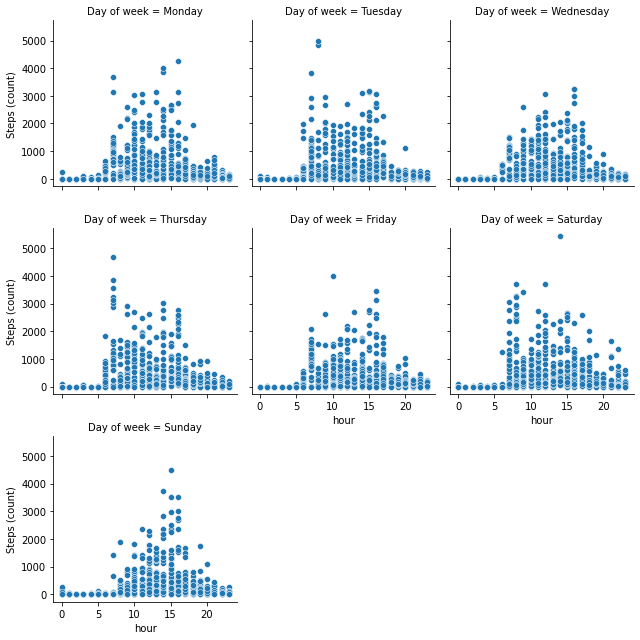

In [3]:
import seaborn as sns
plot = sns.FacetGrid(p7, col ='Day of week',                     
col_order = [
    'Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'
], col_wrap = 3)
plot.map_dataframe(sns.scatterplot, "hour", "Steps (count)")

From the plots we can see that this participant tends to have a fairly normal distribution of steps. On weekdays, the participant tends to walk a greater amount of steps in the mornings, whereas on weekends, the participant tends to have a higher step count in the late afternoon.

Let's visualise the participant's adherence to their tracker.

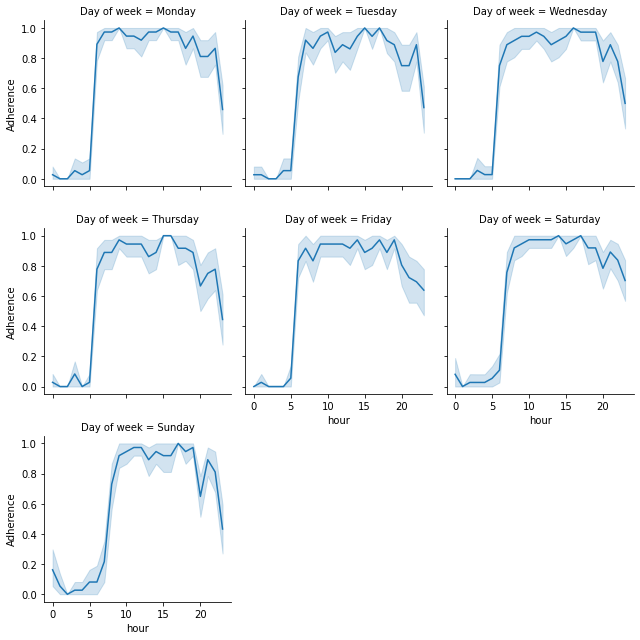

In [4]:
p7_adh = p7.copy() # make a copy of the data
# filter out values where step counts are zero
p7_adh['Adherence'] = p7['Steps (count)'] > 0
plot = sns.FacetGrid(p7_adh, col ='Day of week',                     
col_order = [
    'Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'
], col_wrap = 3)
plot.map_dataframe(sns.lineplot, "hour", "Adherence")

This participant appears to adhere a little inconsistently to their device, between the hours of 5 - 19, then at 20 there is a sharp decline in adherence levels, especially on Sunday. 

4/10/22

Let's examine how hourly fitness activity differs between the weekends and weekdays

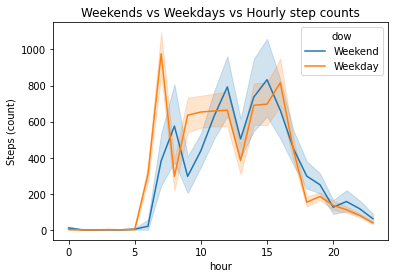

In [5]:
from datetime import datetime
# create a new column that indicates for each step count value whether it occurred on a weekday or weekend
p7_copy['dow'] = p7_copy['Day of week'].apply(lambda x: "Weekday" if x in ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"] else "Weekend")
plot = sns.lineplot(data = p7_copy, hue = 'dow', x ='hour' , y = "Steps (count)").set(title= 'Weekends vs Weekdays vs Hourly step counts')

The weekend and weekday activity do not appear to differ that much, except for a sharp peak between the hours of 5 - 10 on weekdays. 

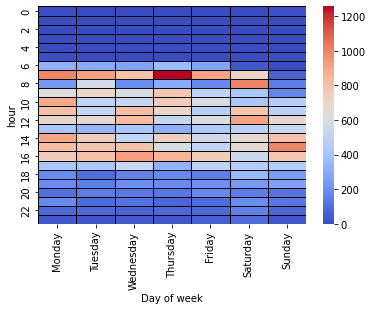

In [6]:
# code taken from Emily's TPP09 notebook
# obtain the mean step counts for each hour of each day of the week
hour_dow_count = p7_copy.groupby(['hour','Day of week']).agg({'Steps (count)': 'mean'}).reset_index()
# change the format such that each cell contains a step count value
hour_dow_count = hour_dow_count.pivot("hour", "Day of week", "Steps (count)")
# change the order of the days of the week
hour_dow_count = hour_dow_count.reindex(
    columns = [
    'Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'])
# plot the heatmap
hmap = sns.heatmap(hour_dow_count, cmap="coolwarm", linewidths=.5, linecolor = 'black')

The highest step count was recorded for 7 am on Thursday. The step counts appear to generally be unpredictable, meaning this participant may not physically go out of their way to exercise.

## References
* pandas.DataFrame.sort_values — pandas 1.5.0 documentation. Pandas. (2022). Retrieved 10 October 2022, from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html.
* 5 ways to apply an IF condition in Pandas DataFrame - Data to Fish. Data to Fish. (2022). Retrieved 10 October 2022, from https://datatofish.com/if-condition-in-pandas-dataframe/.